In [5]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(1, 224, 224, 3)
(224, 224, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 60)      4560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 60)      90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 108, 60)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 60)      32460     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 104, 104, 60)      32460     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 52, 60)        0         
_________________________________________________________________
dropout (Dropout)        

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1
1
1
1
1


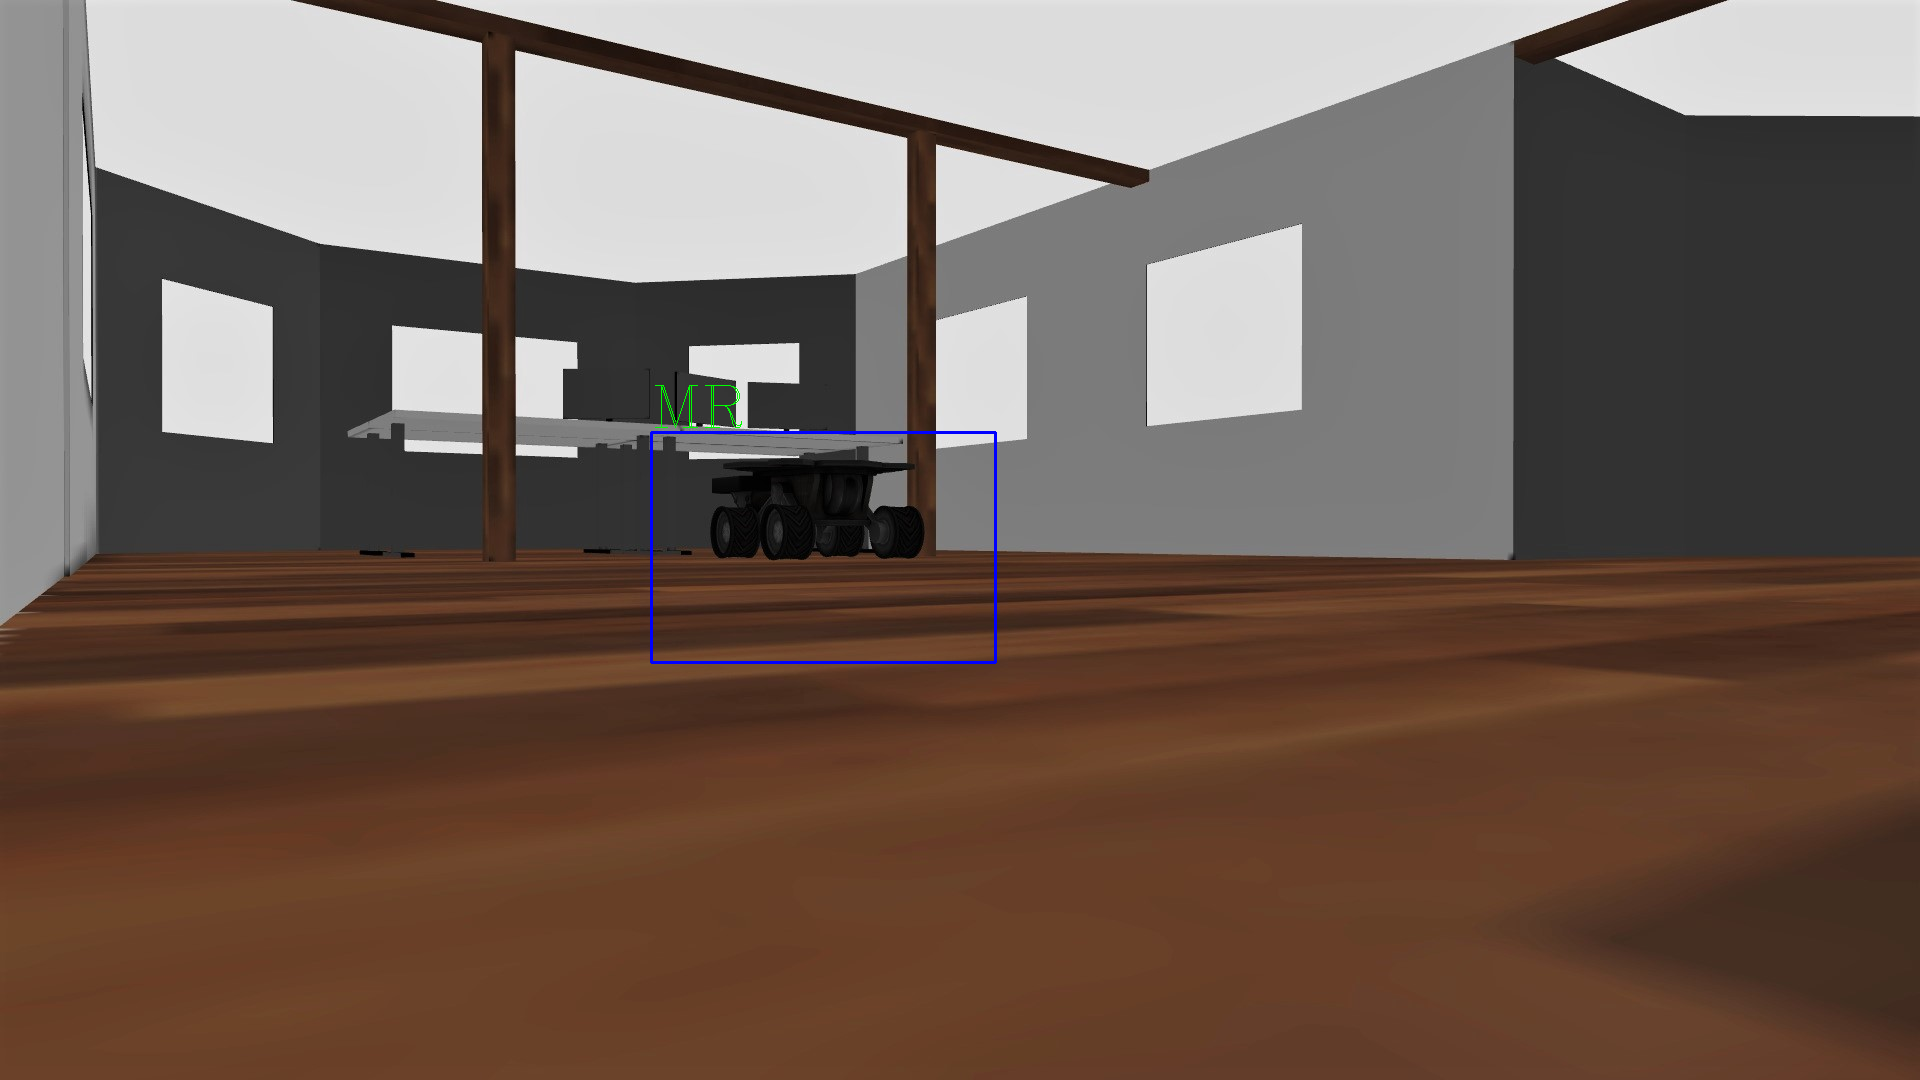

[1, 651, 432, 344, 230]


In [22]:
bowl_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Haarcascades/bowl_cascade.xml')
MR_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Haarcascades/MR_cascade.xml')
QC_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Haarcascades/QC_cascade.xml')
wheel_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Haarcascades/Wheel_cascade.xml')

from tensorflow.keras.models import load_model
model= load_model('/content/drive/MyDrive/models/CNN for RTOA.h5')

class_i=-1;
class_x=-1;
class_y=-1;
class_w=-1;
class_h=-1;

def rtoa(img):
    #1080,1920,3
  img1= tf.image.resize(img,[224,224])
  img2=tf.reshape(img1,[1,224,224,3])
  print(img2.shape)
  print(img1.shape)
  model.summary()
  #for layer in model.layers:
    #print(layer.input_shape)
  predictions= model.predict(img2)
  classNo1=model.predict_classes(img2)
  probabilityValue= np.amax(predictions)
  classNo=classNo1.tolist()
  img1=img;
  class_i=classNo
  print(classNo[0])
  print(classNo[0])
  print(classNo[0])
  print(classNo[0])
  print(classNo[0])
  if classNo[0] is 0:
    bowl = bowl_cascade.detectMultiScale(img1, 1.3, 5)
    for (x,y,w,h) in bowl:
        cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,255),2)
        cv2.putText(img1,'Bowl',(x,y-5),cv2.FONT_HERSHEY_COMPLEX,2,(0,1500),1)
        #roi_gray = gray[y:y+h, x:x+w]
        roi_color = img1[y:y+h, x:x+w]
        cv2_imshow(img1)
        cv2.destroyAllWindows() 
        ans=[classNo[0],x,y,w,h]
        return ans
  if classNo[0] is 1:
    MR = MR_cascade.detectMultiScale(img1, 1.3, 5)
    for (x,y,w,h) in MR:
        cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.putText(img1,'MR',(x,y-5),cv2.FONT_HERSHEY_COMPLEX,2,(0,1500),1)
        #roi_gray = gray[y:y+h, x:x+w]
        roi_color = img1[y:y+h, x:x+w]
        cv2_imshow(img1)
        cv2.destroyAllWindows()
        ans=[classNo[0],x,y,w,h]
        return ans
  if classNo[0] is 2:
    QC = QC_cascade.detectMultiScale(img1, 1.3, 5)
    for (x,y,w,h) in QC:
        cv2.rectangle(img1,(x,y),(x+w,y+h),(0,0,255),2)
        cv2.putText(img1,'QC',(x,y-5),cv2.FONT_HERSHEY_COMPLEX,2,(0,1500),1)
        #roi_gray = gray[y:y+h, x:x+w]
        roi_color = img1[y:y+h, x:x+w]
        cv2_imshow(img1)
        cv2.destroyAllWindows()
        ans=[classNo[0],x,y,w,h]
        return ans
  if classNo[0] is 3:
    Wheel = wheel_cascade.detectMultiScale(img1, 1.3, 5)
    for (x,y,w,h) in Wheel:
        cv2.rectangle(img1,(x,y),(x+w,y+h),(255,255,0),2)
        cv2.putText(img1,'Wheel',(x,y-5),cv2.FONT_HERSHEY_COMPLEX,2,(0,1500),1)
        #roi_gray = gray[y:y+h, x:x+w]
        roi_color = img1[y:y+h, x:x+w]
        cv2_imshow(img1)
        cv2.destroyAllWindows()
        ans=[classNo[0],x,y,w,h]
        return ans

img1= cv2.imread('/content/drive/MyDrive/cascade testing images/sample6.jpg')
ans=rtoa(img1)
print(ans)